In [5]:
import pandas as pd
framingham = pd.read_csv('framingham.csv')# Dropping null values
framingham = framingham.dropna()
framingham.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
framingham['TenYearCHD'].value_counts()

TenYearCHD
0    3101
1     557
Name: count, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'framingham' DataFrame is already loaded
X = framingham.drop('TenYearCHD', axis=1)
y = framingham['TenYearCHD']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Oversampling the minority class in the training set
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_train, y_train)

# Training the RandomForest classifier
rf = RandomForestClassifier()
rf.fit(X_over, y_over)

# Making predictions on the test set
y_pred = rf.predict(X_test)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)


In [8]:
preds = rf.predict(X_test)
print(accuracy_score(y_test,preds))

NameError: name 'accuracy_score' is not defined

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score # Import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'framingham' DataFrame is already loaded
X = framingham.drop('TenYearCHD', axis=1)
y = framingham['TenYearCHD']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Oversampling the minority class in the training set
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_train, y_train)

# Training the RandomForest classifier
rf = RandomForestClassifier()
rf.fit(X_over, y_over)

# Making predictions on the test set
y_pred = rf.predict(X_test)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

preds = rf.predict(X_test)
print(accuracy_score(y_test,preds))

0.8524590163934426


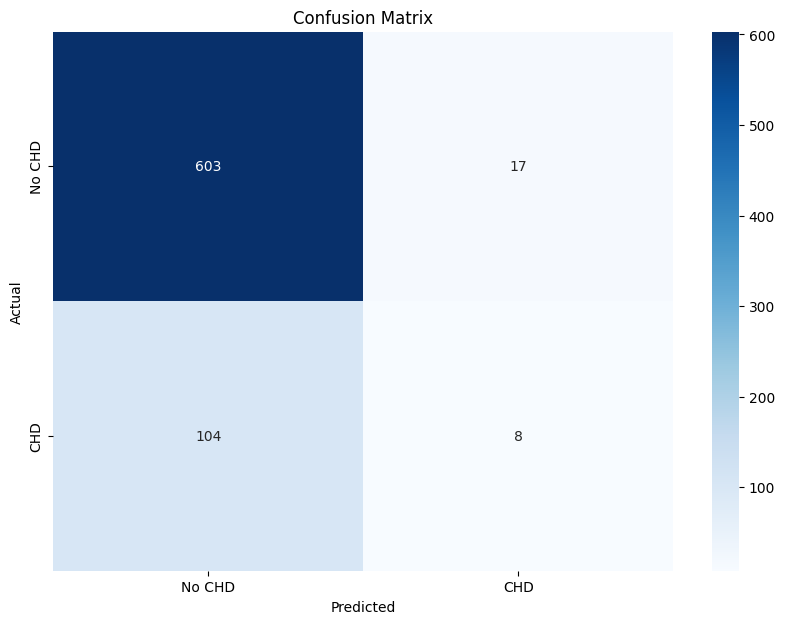

In [9]:
# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No CHD', 'CHD'], yticklabels=['No CHD', 'CHD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Identifying the true positive cases
true_positives_indices = (y_test == 1) & (y_pred == 1)
true_positives = X_test[true_positives_indices]
